In [21]:
!pip install -q gdown

# Download the two datasets from the links they gave you
!gdown --id 1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs -O historical_trades.csv
!gdown --id 1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf -O fear_greed.csv


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/historical_trades.csv
100% 47.5M/47.5M [00:00<00:00, 192MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/fear_greed.csv
100% 90.8k/90.8k [00:00<00:00, 69.8MB/s]


In [22]:
import pandas as pd

# Load the datasets
trades = pd.read_csv("historical_trades.csv")
sentiment = pd.read_csv("fear_greed.csv")

# Look at the first few rows
print("Historical Trader Data:")
display(trades.head())

print("\nFear & Greed Index Data:")
display(sentiment.head())

# Check basic info
print("\nTrades Info:")
print(trades.info())

print("\nSentiment Info:")
print(sentiment.info())


Historical Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Fear & Greed Index Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Trades Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: boo

In [23]:
# Convert timestamps in trades to proper datetime (day first)
trades["Timestamp IST"] = pd.to_datetime(trades["Timestamp IST"], dayfirst=True)
trades["trade_date"] = trades["Timestamp IST"].dt.date

# Convert sentiment date column to datetime.date type
sentiment["date"] = pd.to_datetime(sentiment["date"]).dt.date

# Merge datasets on date
merged_df = pd.merge(
    trades,
    sentiment,
    left_on="trade_date",
    right_on="date",
    how="left"
)

print("Merged Data Sample:")
display(merged_df.head())

print("\nMerged Data Info:")
print(merged_df.info())


Merged Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02



Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float

In [24]:
# Group by sentiment classification and calculate average & total PnL
pnl_by_sentiment = (
    merged_df.groupby("classification")["Closed PnL"]
    .agg(["count", "mean", "sum"])
    .reset_index()
    .sort_values(by="mean", ascending=False)
)

print(pnl_by_sentiment)


  classification  count       mean           sum
1  Extreme Greed  39992  67.892861  2.715171e+06
2           Fear  61837  54.290400  3.357155e+06
3          Greed  50303  42.743559  2.150129e+06
0   Extreme Fear  21400  34.537862  7.391102e+05
4        Neutral  37686  34.307718  1.292921e+06


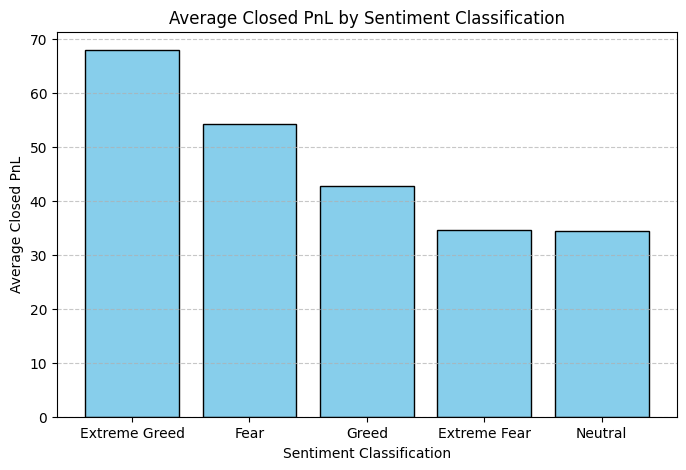

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(pnl_by_sentiment["classification"], pnl_by_sentiment["mean"], color="skyblue", edgecolor="black")
plt.title("Average Closed PnL by Sentiment Classification")
plt.xlabel("Sentiment Classification")
plt.ylabel("Average Closed PnL")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


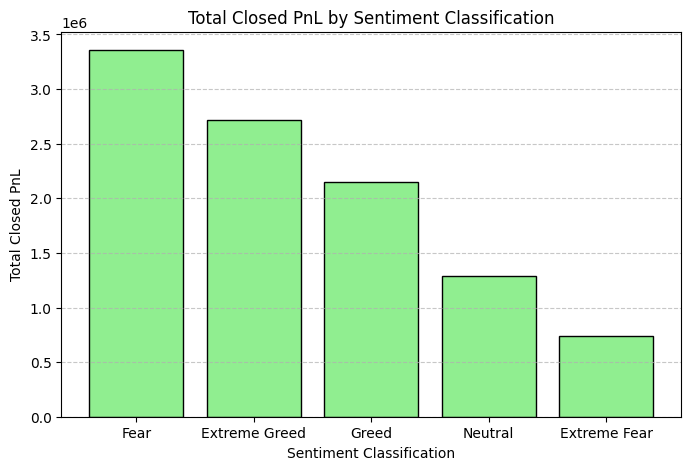

In [26]:
# Calculate total Closed PnL by sentiment classification
total_pnl_by_sentiment = merged_df.groupby("classification")["Closed PnL"].sum().reset_index()

# Sort by total PnL (optional, for better readability)
total_pnl_by_sentiment = total_pnl_by_sentiment.sort_values(by="Closed PnL", ascending=False)

# Plot
plt.figure(figsize=(8,5))
plt.bar(total_pnl_by_sentiment["classification"], total_pnl_by_sentiment["Closed PnL"],
        color="lightgreen", edgecolor="black")
plt.title("Total Closed PnL by Sentiment Classification")
plt.xlabel("Sentiment Classification")
plt.ylabel("Total Closed PnL")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



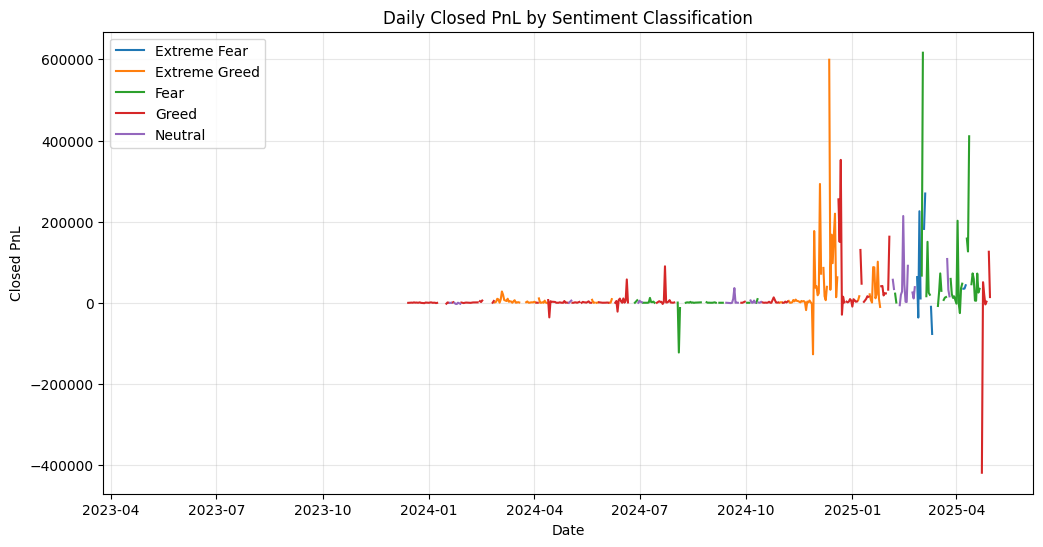

In [27]:
# Group by date and sentiment to see PnL over time
daily_pnl = merged_df.groupby(["trade_date", "classification"])["Closed PnL"].sum().reset_index()

# Pivot for plotting (sentiment categories as columns)
daily_pnl_pivot = daily_pnl.pivot(index="trade_date", columns="classification", values="Closed PnL")

# Plot
plt.figure(figsize=(12,6))
for col in daily_pnl_pivot.columns:
    plt.plot(daily_pnl_pivot.index, daily_pnl_pivot[col], label=col)

plt.title("Daily Closed PnL by Sentiment Classification")
plt.xlabel("Date")
plt.ylabel("Closed PnL")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


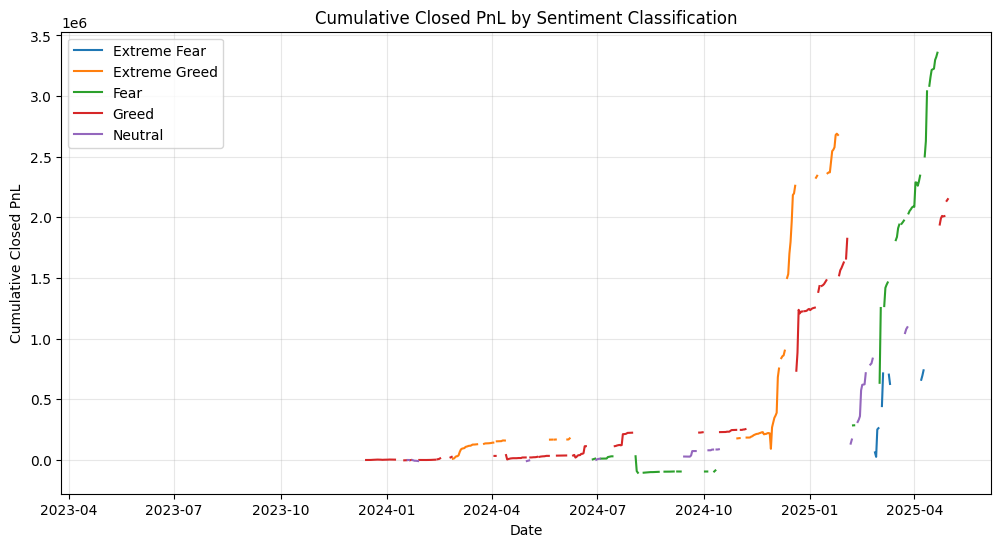

In [28]:
# Cumulative PnL per sentiment
cumulative_pnl = daily_pnl.copy()
cumulative_pnl["Cumulative PnL"] = cumulative_pnl.groupby("classification")["Closed PnL"].cumsum()

# Pivot for plotting
cumulative_pnl_pivot = cumulative_pnl.pivot(index="trade_date", columns="classification", values="Cumulative PnL")

# Plot
plt.figure(figsize=(12,6))
for col in cumulative_pnl_pivot.columns:
    plt.plot(cumulative_pnl_pivot.index, cumulative_pnl_pivot[col], label=col)

plt.title("Cumulative Closed PnL by Sentiment Classification")
plt.xlabel("Date")
plt.ylabel("Cumulative Closed PnL")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


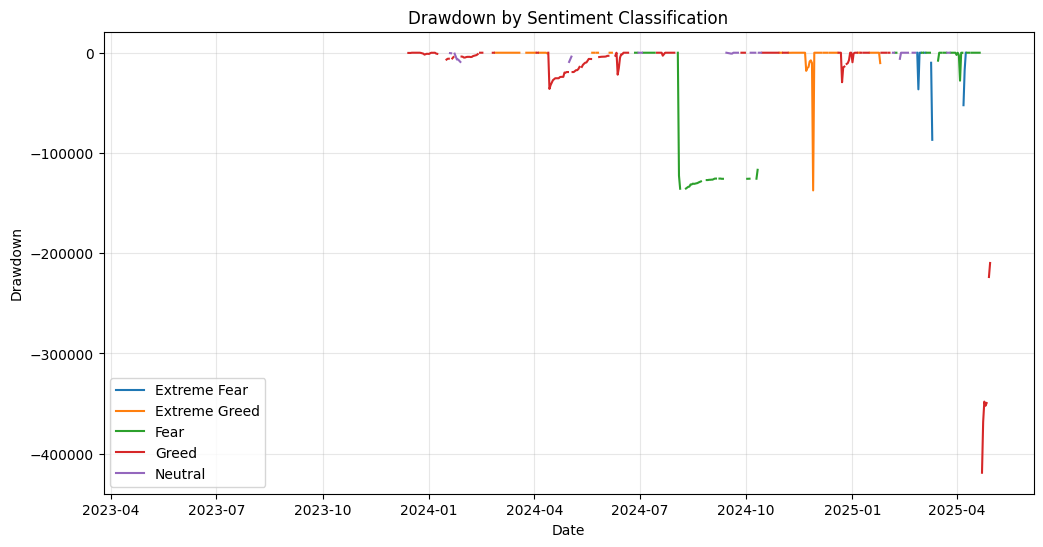

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

drawdowns = {}

# Calculate drawdowns per sentiment
for sentiment, group in cumulative_pnl.groupby("classification"):
    cum_values = group["Cumulative PnL"].values
    running_max = np.maximum.accumulate(cum_values)
    dd = cum_values - running_max
    drawdowns[sentiment] = pd.Series(dd, index=group["trade_date"])

# Combine into one DataFrame aligned by trade_date
drawdown_df = pd.DataFrame(drawdowns)

# Plot drawdowns
plt.figure(figsize=(12,6))
for col in drawdown_df.columns:
    plt.plot(drawdown_df.index, drawdown_df[col], label=col)

plt.title("Drawdown by Sentiment Classification")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [30]:
summary = cumulative_pnl.groupby("classification").agg(
    Total_PnL=("Closed PnL", "sum"),
    Average_PnL=("Closed PnL", "mean"),
    Win_Rate=("Closed PnL", lambda x: (x > 0).mean()),
    Max_Drawdown=("Cumulative PnL", lambda x: (x - np.maximum.accumulate(x)).min())
).reset_index()

summary


,classification,Total_PnL,Average_PnL,Win_Rate,Max_Drawdown
0,Extreme Fear,7.391102e+05,52793.589178,0.642857,-86890.756306
1,Extreme Greed,2.715171e+06,23817.292199,0.877193,-137369.608718
2,Fear,3.357155e+06,36891.818040,0.736264,-135685.666052
3,Greed,2.150129e+06,11140.566181,0.725389,-419020.225731
4,Neutral,1.292921e+06,19297.323516,0.671642,-10116.875552


In [31]:
print(merged_df.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'trade_date', 'timestamp', 'value', 'classification', 'date']


In [32]:
# Normalize column names for easier access
merged_df.columns = (
    merged_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# Now the column will be 'closed_pnl'
summary = merged_df.groupby("classification").apply(lambda g: pd.Series({
    "Total_PnL": g["closed_pnl"].sum(),
    "Average_PnL": g["closed_pnl"].mean(),
    "Win_Rate": (g["closed_pnl"] > 0).mean(),
    "Max_Drawdown": (g["closed_pnl"].cumsum() - g["closed_pnl"].cumsum().cummax()).min(),
    "Average_Leverage": g["leverage"].mean() if "leverage" in g else None,
    "Total_Volume": g["size_tokens"].sum() if "size_tokens" in g else None
})).reset_index()

summary


/tmp/ipython-input-1925913514.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = merged_df.groupby("classification").apply(lambda g: pd.Series({


,classification,Total_PnL,Average_PnL,Win_Rate,Max_Drawdown,Average_Leverage,Total_Volume
0,Extreme Fear,7.391102e+05,34.537862,0.370607,-217850.312511,NaN,3.586412e+07
1,Extreme Greed,2.715171e+06,67.892861,0.464943,-152323.104200,NaN,3.532260e+08
2,Fear,3.357155e+06,54.290400,0.420768,-113383.715290,NaN,1.850560e+08
3,Greed,2.150129e+06,42.743559,0.384828,-460774.419591,NaN,2.371951e+08
4,Neutral,1.292921e+06,34.307718,0.396991,-132639.360699,NaN,1.651916e+08


In [33]:
import os

os.makedirs("outputs", exist_ok=True)
os.makedirs("csv_files", exist_ok=True)


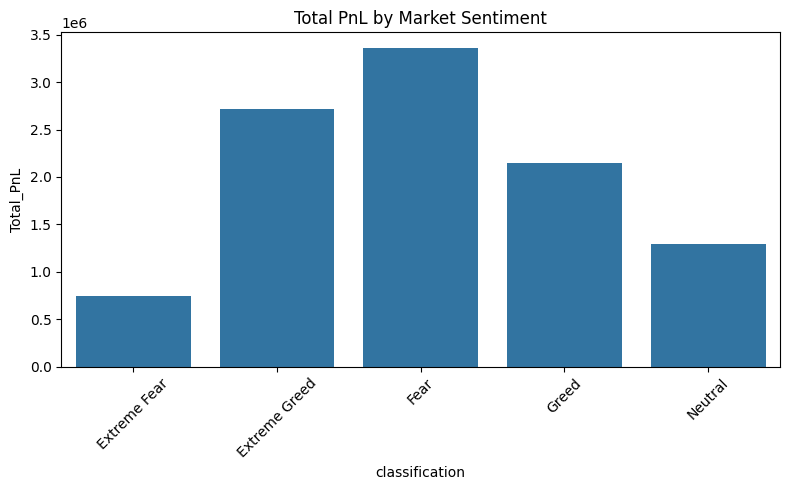

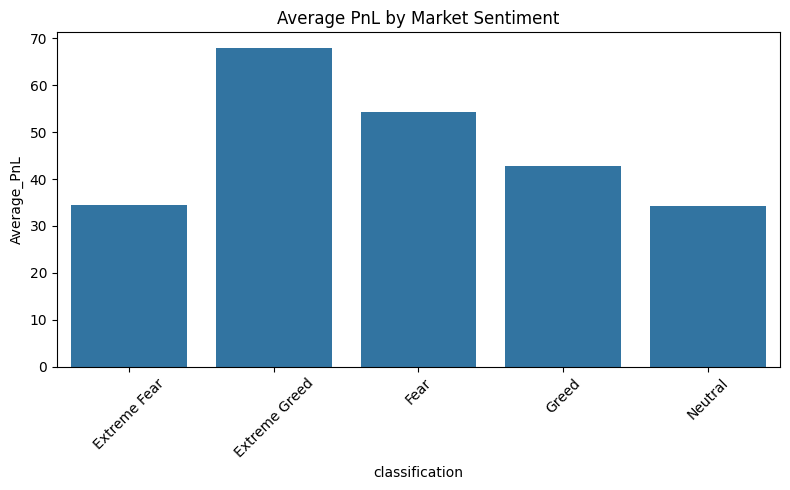

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total PnL
plt.figure(figsize=(8,5))
sns.barplot(x="classification", y="Total_PnL", data=summary)
plt.title("Total PnL by Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/total_pnl_by_sentiment.png")
plt.show()

# Average PnL
plt.figure(figsize=(8,5))
sns.barplot(x="classification", y="Average_PnL", data=summary)
plt.title("Average PnL by Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/average_pnl_by_sentiment.png")
plt.show()


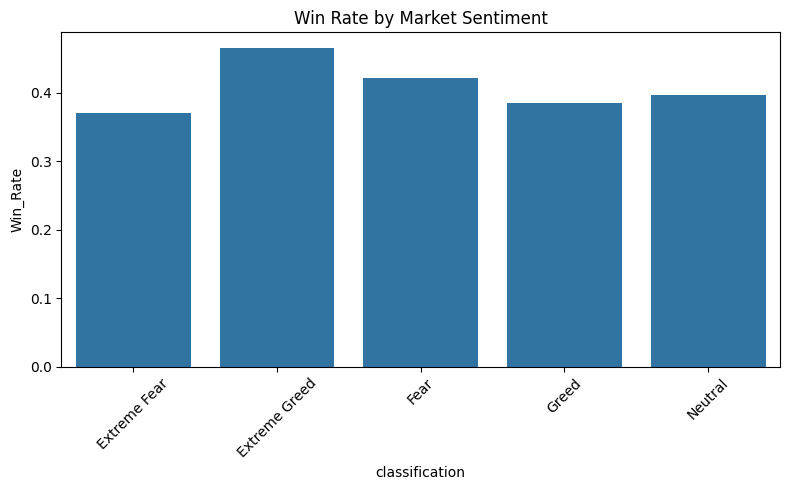

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x="classification", y="Win_Rate", data=summary)
plt.title("Win Rate by Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/win_rate_by_sentiment.png")
plt.show()


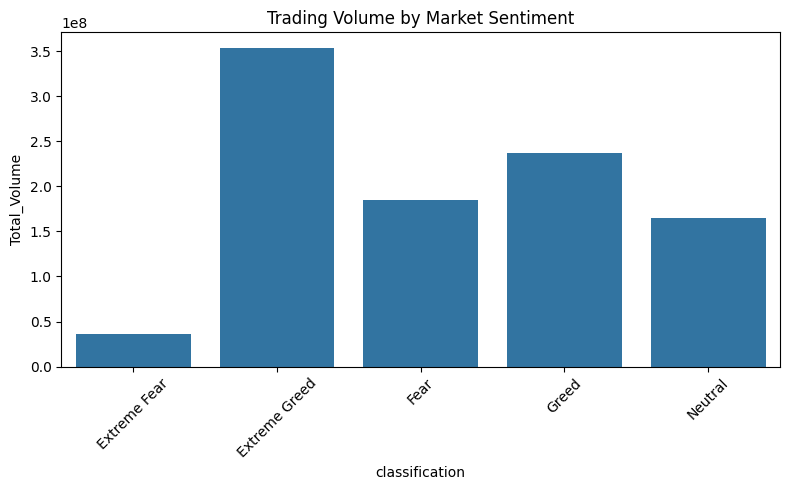

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x="classification", y="Total_Volume", data=summary)
plt.title("Trading Volume by Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/volume_by_sentiment.png")
plt.show()


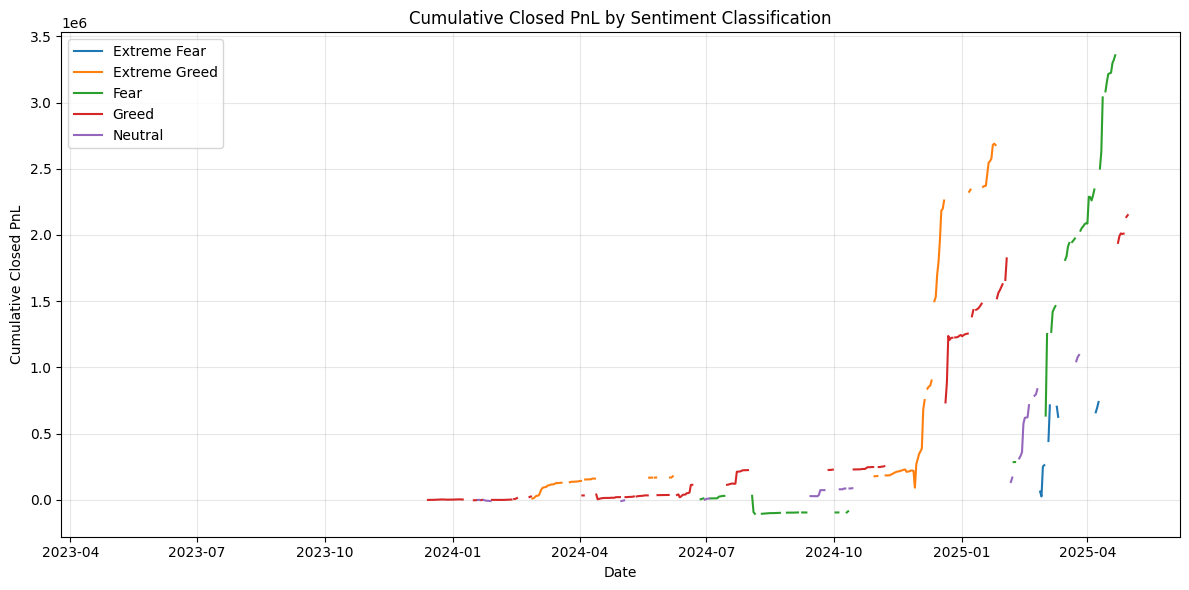

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute cumulative PnL by sentiment
cumulative_pnl = daily_pnl.copy()
cumulative_pnl["Cumulative PnL"] = cumulative_pnl.groupby("classification")["Closed PnL"].cumsum()

# Pivot for plotting
cumulative_pnl_pivot = cumulative_pnl.pivot(index="trade_date", columns="classification", values="Cumulative PnL")

# Plot
plt.figure(figsize=(12,6))
for col in cumulative_pnl_pivot.columns:
    plt.plot(cumulative_pnl_pivot.index, cumulative_pnl_pivot[col], label=col)

plt.title("Cumulative Closed PnL by Sentiment Classification")
plt.xlabel("Date")
plt.ylabel("Cumulative Closed PnL")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("outputs/cumulative_pnl_by_sentiment.png")
plt.show()


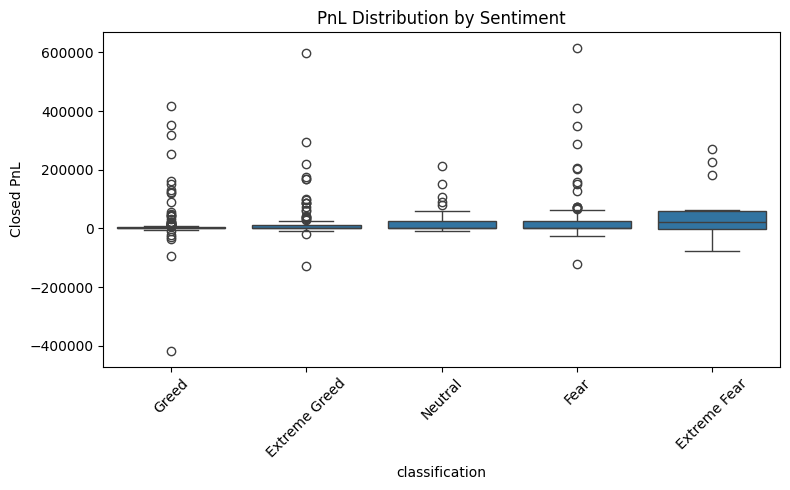

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x="classification", y="Closed PnL", data=daily_pnl)
plt.title("PnL Distribution by Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/boxplot_pnl_by_sentiment.png")
plt.show()


In [39]:
print(merged_df.columns.tolist())


['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'trade_date', 'timestamp', 'value', 'classification', 'date']


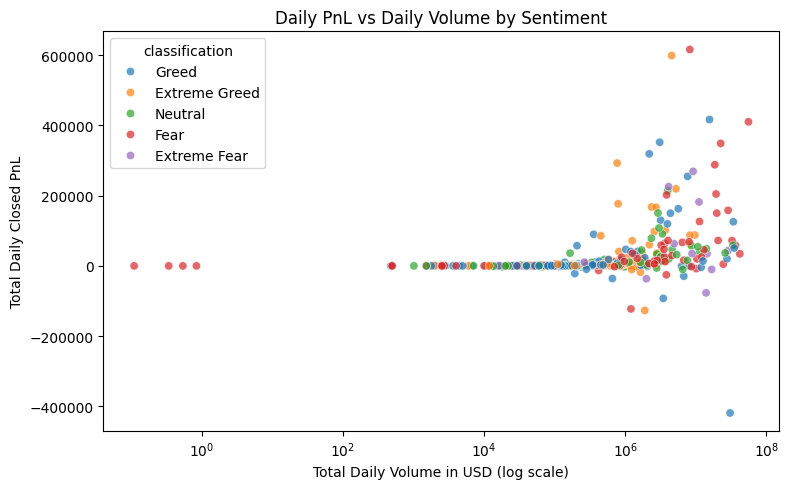

In [40]:
daily_volume = merged_df.groupby(["trade_date", "classification"], as_index=False).agg({
    "size_usd": "sum",
    "closed_pnl": "sum"
})

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="size_usd",
    y="closed_pnl",
    hue="classification",
    data=daily_volume,
    alpha=0.7
)
plt.title("Daily PnL vs Daily Volume by Sentiment")
plt.xscale("log")
plt.xlabel("Total Daily Volume in USD (log scale)")
plt.ylabel("Total Daily Closed PnL")
plt.tight_layout()
plt.savefig("outputs/scatter_daily_volume_vs_pnl.png")
plt.show()


In [41]:
# Save processed datasets into csv_files folder
merged_df.to_csv("csv_files/merged_data.csv", index=False)
summary.to_csv("csv_files/summary_by_sentiment.csv", index=False)
